## Dataset Formatter

In this notebook the dataset is organized in training and test sets. However we have to be clear about how the dataset is to be used when training by using hugging face.

The complete dataset contains 431698 samples with 12 characteristics that include the corresponding labels in one hot encoding.

The dataset will be organized as follows:

$\mathcal{X}_{train}\in \mathcal{R}^{341698 \times 12 } $

$\mathcal{X}_{test}\in \mathcal{R}^{90000 \times 12 } $


In [4]:
import pandas as pd
import numpy as np
import os
dir_root = os.getcwd()
dir_root


'/home/falconiel/CodePrograms/clasificaion_robos_fge'

In [5]:
# dataset_total = pd.read_csv(os.path.join(dir_root, 'data/raw/dataset.csv'), converters={'NDD':str})
dataset_total = pd.read_csv(os.path.join(dir_root, 'data/raw/dataset_validados_full.csv'), converters={'NDD':str})
dataset_total.sample(5)

,NDD,RELATO,cantidad_palabras,Tipo_Delito_PJ,delitos_seguimiento,LABELS
304676,170101814100518,el dia y hora indicada sujetos desconocidos ha...,38,ROBO,ROBO A DOMICILIO,ROBO A DOMICILIO
303014,170101814084439,es el caso señor fiscal que el día miércoles 2...,151,ROBO,ROBO A UNIDADES ECONOMICAS,ROBO A UNIDADES ECONOMICAS
182914,090101821061992,señor fiscal el día viernes 11 de junio del 20...,110,ROBO,ROBO DE MOTOS,ROBO DE MOTOS
30851,060101815090124,señor fiscal sírvase encontrar el presente par...,52,ROBO,SIN INFORMACION,ROBO A INSTITUCIONES EDUCATIVAS
319272,170101815085055,es el caso señor fiscal que el día lunes 24 de...,58,ROBO,ROBO A DOMICILIO,ROBO A DOMICILIO


Some preprocessing

In [6]:
dataset_total.RELATO = dataset_total.RELATO.str.lower()
dataset_total.RELATO = dataset_total.RELATO.str.strip()
dataset_total.RELATO = dataset_total.RELATO.str.replace("[^A-Za-z0-9áéíóúÁÉÍÓÚñÑ]+", " ", regex=True)

In [7]:
from utils import camel_case_string_noPoint
new_names = []
for col in dataset_total.columns:
    new_names.append(camel_case_string_noPoint(col))
new_names

['ndd',
 'relato',
 'cantidadPalabras',
 'tipoDelitoPj',
 'delitosSeguimiento',
 'labels']

<AxesSubplot:>

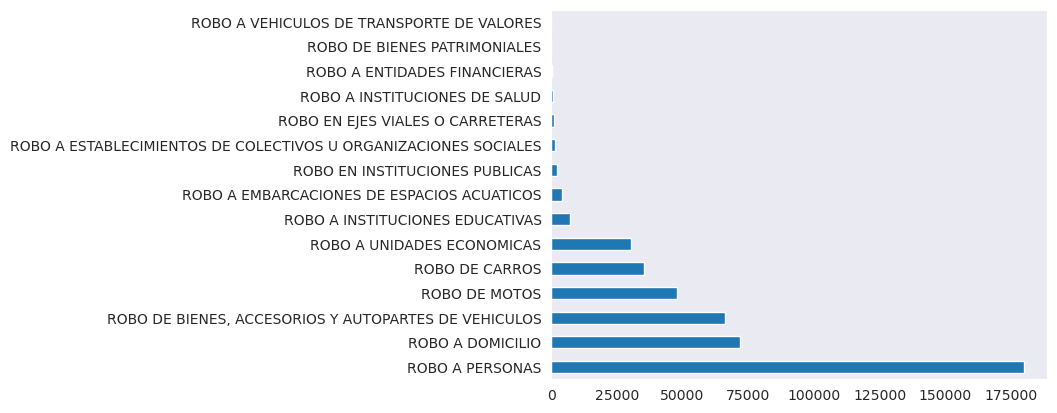

In [27]:
dataset_total.labels.value_counts().plot.barh()

In [8]:
dataset_total.columns = new_names
dataset_total.sample(5)

,ndd,relato,cantidadPalabras,tipoDelitoPj,delitosSeguimiento,labels
120525,090101816113894,es el caso señor fiscal que el 22 de noviembre...,102,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
214016,090901822020004,señala el denunciante que el día 02 de febrero...,261,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
226066,092001815100049,es el caso señor fiscal que el día de hoy 20 d...,118,ROBO,SIN INFORMACION,ROBO A INSTITUCIONES EDUCATIVAS
448219,240301821110002,es el caso señorita fiscal que el día de hoy 0...,202,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
269886,130301818080090,se adjunta parte policial número de oficio 106...,48,ROBO,ROBO A DOMICILIO,ROBO A DOMICILIO


Applying shuffle to the dataset in order to randomly order the samples in the data

In [9]:
from sklearn.utils import shuffle
dataset_total_shuffle = shuffle(dataset_total, random_state=42)
dataset_total_shuffle.reset_index(inplace=True)
dataset_total.shape, dataset_total_shuffle.shape

((448478, 6), (448478, 7))

In [10]:
TEST_SIZE = 90000
TRAIN_SIZE = dataset_total.shape[0] - TEST_SIZE
train_df = dataset_total_shuffle.iloc[0:TRAIN_SIZE, :]
test_df = dataset_total_shuffle.iloc[TRAIN_SIZE:, :]
# training_sentences = sentences[0:training_size]
# testing_sentences = sentences[training_size:]
# training_labels = labels[0:training_size]
# testing_labels = labels[training_size:]

In [11]:
train_df.tail()

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,delitosSeguimiento,labels
358473,263688,121201816120025,es caso señor fiscal que el día 16 de diciembr...,221,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
358474,35680,060101821090236,adjunto parte policial no 202109100837136710 d...,58,ROBO,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH...","ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH..."
358475,204184,090701816080133,es el caso señor fiscal que el día 08 de agost...,229,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
358476,128243,090101817052738,es el caso señor fiscal que el dia de hoy 12 d...,114,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
358477,422133,210101816030121,es el caso señor fiscal que el dia de ayer 09 ...,121,ROBO,ROBO DE MOTOS,ROBO DE MOTOS


In [12]:
test_df.head()

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,delitosSeguimiento,labels
358478,75327,090101814015458,es el caso señor fiscal que el día 27 de enero...,273,ROBO,ROBO A DOMICILIO,ROBO A DOMICILIO
358479,213026,090901817070053,es el caso señora fiscal que el día de hoy 20 ...,122,ROBO,ROBO A DOMICILIO,ROBO A DOMICILIO
358480,55053,070901815060152,han ingresado a la casa de mi hermano aprovech...,46,ROBO,ROBO A DOMICILIO,ROBO A DOMICILIO
358481,409402,170301821020085,adjunta parte policial n 2021022111015227613 e...,49,ROBO,ROBO DE CARROS,ROBO DE CARROS
358482,209783,090701821110013,es el caso señor fiscal que el día 29 de octub...,143,ROBO,ROBO DE MOTOS,ROBO DE MOTOS


In [13]:
train_df.shape, test_df.shape

((358478, 7), (90000, 7))

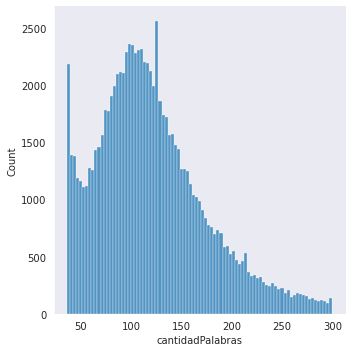

In [14]:
import seaborn as sns
sns.set_style('dark')
sns.displot(test_df.cantidadPalabras)

/home/falconiel/anaconda3/envs/fge_dir/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cantidadPalabras', ylabel='Density'>

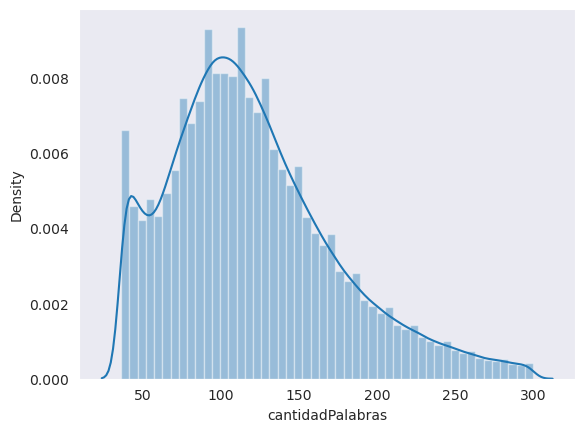

In [15]:
sns.distplot(train_df.cantidadPalabras)

## Generating Validation dataset
Checking some of the bibliography in HuggingFaces, there is a procedure to create the validation dataset from testing set. However, I have also made that from the training set using train test split of sklearn. Let us explore which is the best way to obtain that. In either case, saving the datset should be final because shuffle of the data can be applied. In videos, validation dataset has been obtained from the trainig set, reducing a bit its size. Consider that the operation to split the dataset can be from the dataset dict object that can be created using hugging faces: https://discuss.huggingface.co/t/how-to-split-main-dataset-into-train-dev-test-as-datasetdict/1090


In [16]:
train_df.shape, test_df.shape

((358478, 7), (90000, 7))

I think since there were some initial problems in memory when applying tokenize to train dataset, it could be ok to lower a bit its size by extracting validation set out of it

In [17]:
TRAIN_SIZE, TEST_SIZE, 0.8*TRAIN_SIZE, 0.2*TRAIN_SIZE, TEST_SIZE/(TRAIN_SIZE+TEST_SIZE)*100

(358478, 90000, 286782.4, 71695.6, 20.06787400942744)

We could also get 50% of testing cases for validation considering what they recommend in https://discuss.huggingface.co/t/how-to-split-main-dataset-into-train-dev-test-as-datasetdict/1090. However this would lower testing samples to 45000, validation samples to 45000 and training samples would remain at 341669. 

In [18]:
VALID_SIZE = int(0.2*TRAIN_SIZE)
TRAIN_SIZE -= VALID_SIZE
TRAIN_SIZE, VALID_SIZE

(286783, 71695)

In [19]:
train_df_out = train_df.iloc[0:TRAIN_SIZE, :]
valid_df = train_df.iloc[TRAIN_SIZE:, :]

In [20]:
train_df_out.tail()

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,delitosSeguimiento,labels
286778,421941,210101815120276,es el caso señor fiscal que el dia martes 15 d...,152,ROBO,SIN INFORMACION,ROBO A INSTITUCIONES EDUCATIVAS
286779,276936,130801817050220,es el caso señor fiscal que el dia 08 de mayo ...,87,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
286780,260602,120901815050007,es el caso señor fiscal que el día de ayer 05 ...,219,ROBO,ROBO DE MOTOS,ROBO DE MOTOS
286781,331026,170101816053622,es el caso señor fiscal que el día 18 05 2016 ...,63,ROBO,ROBO DE CARROS,ROBO DE CARROS
286782,56587,070901819010131,iba en bicilceta luego me detuve en una vereda...,68,ROBO,ROBO A PERSONAS,ROBO A PERSONAS


In [21]:
valid_df.head()

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,delitosSeguimiento,labels
286783,109081,090101816026281,es el caso señor fiscal que el día 29 de febre...,147,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
286784,176416,090101820120783,es el caso señor fiscal que el día de hoy 04 d...,202,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
286785,181857,090101821051517,es el caso señor fiscal que el día de hoy 11 d...,141,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
286786,152654,090101819021973,es el caso señor fiscal que el día de hoy 11 d...,104,ROBO,ROBO A PERSONAS,ROBO A PERSONAS
286787,48273,070101821030025,es el caso señor fiscal que el día sábado 27 f...,233,ROBO,ROBO A UNIDADES ECONOMICAS,ROBO A UNIDADES ECONOMICAS


In [22]:
train_df_out.shape, test_df.shape, valid_df.shape

((286783, 7), (90000, 7), (71695, 7))

In [23]:
# train_df_out.to_csv(os.path.join(dir_root,'data/interim/trainset.csv'), index=False)
train_df_out.to_csv(os.path.join(dir_root,'data/interim/trainset_delvalidados.csv'), index=False)
# test_df.to_csv(os.path.join(dir_root,'data/interim/testset.csv'), index=False)
test_df.to_csv(os.path.join(dir_root,'data/interim/testset_delvalidados.csv'), index=False)
# valid_df.to_csv(os.path.join(dir_root,'data/interim/validset.csv'), index=False)
valid_df.to_csv(os.path.join(dir_root,'data/interim/validset_delvalidados.csv'), index=False)

In [24]:
train_df_huggingface = train_df_out[['relato', 'labels']]
test_df_huggingface = test_df[['relato', 'labels']]
valid_df_huggingface = valid_df[['relato', 'labels']]

In [25]:
valid_df_huggingface.sample(3)

,relato,labels
312687,es el caso señor fiscal que el de ayer 25 de n...,ROBO A EMBARCACIONES DE ESPACIOS ACUATICOS
317580,sucede señor fiscal que el dia 31 de enero del...,ROBO A PERSONAS
347036,es el caso señor fiscal que el día 21 de dicie...,ROBO A PERSONAS


In [26]:
# train_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/trainsethugf.csv'), index=False)
# test_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/testsethugf.csv'), index=False)
# valid_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/validsethugf.csv'), index=False)
train_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/trainsethugf_validados.csv'), index=False)
test_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/testsethugf_validados.csv'), index=False)
valid_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/validsethugf_validados.csv'), index=False)